# Fantasy Football Data: A data scientist's attempt at picking the perfect team

Welcome to this interactive Python notebook dedicated to the captivating realm of fantasy football data investigation! In this notebook, we will embark on a journey to explore the intricate relationship between various factors and our primary target variable: "total_points." If you have a passion for Football, data analysis, or both, you're in for a treat!

## Notebook Highlights

1. **Getting Acquainted with the Dataset**: Let's begin by loading and acquainting ourselves with the dataset that will be the cornerstone of our analysis. Our dataset comprises a rich collection of statistics from fantasy football players, encompassing essential details like player positions, team, minutes played, goals scored, assists, and more.

2. **Feature Selection and Crafting**: To uncover the factors that significantly influence a player's fantasy performance, we'll first identify key features that are likely to impact our target variable, "total_points." Additionally, we'll explore the possibility of creating new features to capture nuanced insights.

3. **Diving into Exploratory Data Analysis (EDA)**: Exploratory Data Analysis is pivotal in comprehending data distributions, relationships, and trends. Through visualizations and initial analyses, we will unearth valuable insights into correlations, distributions, and potential anomalies.

4. **Unveiling Statistical Insights**: Our exploration will transcend visualizations, as we employ statistical methods to quantify relationships between different variables. From correlation analysis to hypothesis testing, this section will lay a sturdy statistical foundation for our investigation.


Upon concluding this notebook, you will not only possess a deeper comprehension of the diverse factors influencing a football player's fantasy performance but also acquire practical skills encompassing data investigation, visualization, statistical analysis, all within the exciting context of football.

Whether your aim is to strategize for the best fantasy team or understand a little more about data science, let's get started by taking a look at some of the data we are going to be working with! ⚽📊📈


## 1. Reading in our data

Gaining access to fantasy football data can sometimes be challenging, Lucky for you I have compiled a library of functions that should get all of the data you could ever want and need about a player!

We will start the notebook by importing in the relevant librarys we need as seen bellow:

In [2]:
from fpl_data.player_data import *
import matplotlib.pyplot as plt 
import seaborn as sns

Now that we have imported the library we can start to grab some of the data we need. The first thing I would do is take a look at the static data that gets updated each gameweek. 

To do this lets use the method **get_static_data()**

In [3]:
get_static_data()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,100.0,100.0,232223,0,0,0,0,0,4,0.5,...,430,68,504,48,504,48,205,38,0.00,0.0
1,NaN,NaN,58822,0,0,0,0,0,2,0.5,...,567,155,333,111,333,111,258,96,0.00,0.0
2,0.0,0.0,153256,-1,1,-1,1,0,3,0.0,...,546,287,439,155,439,155,422,136,0.00,0.0
3,NaN,NaN,438098,-1,1,-1,1,0,3,0.5,...,149,95,648,277,648,277,418,133,0.00,0.0
4,NaN,NaN,226597,-1,1,-1,1,0,2,1.5,...,300,33,240,84,272,103,14,6,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,NaN,NaN,200402,0,0,0,0,0,2,1.0,...,399,88,223,77,232,86,251,92,1.00,0.0
671,NaN,NaN,510362,0,0,0,0,0,2,0.5,...,521,134,295,107,258,99,441,168,0.00,0.0
672,NaN,NaN,476502,0,0,0,0,0,3,0.0,...,489,254,538,194,538,194,231,72,0.00,0.0
673,100.0,100.0,430871,0,0,0,0,0,4,2.0,...,123,33,159,21,164,21,211,39,1.08,0.0


Now this is in a format that is not great to work with luckily I have built a function to clean that data and also map up some of the values so that they can be understood by humans 

In [4]:
df = get_static_data()
df = clean_static_data(df)

Now that we have some of this seasons data it would be good to understand what relationship our points have had with each of the variables so far. Lets build out a few plots so that we can try to understand a little bit about our target variable total_points

In [5]:
print("Total points earned so far this season: " + str(df['total_points'].sum()))
print("Average points earned so far this season: " + str(df['total_points'].mean()))
print("Total number of players: " + str(df['id'].shape[0]))
print("Total number of teams: " + str(df['team_code'].drop_duplicates().shape[0]))
print("Average cost: " + str(df['now_cost'].mean()))
print("Min cost: " + str(df['now_cost'].min()))
print("Max cost: " + str(df['now_cost'].max()))

Total points earned so far this season: 1545
Average points earned so far this season: 2.2888888888888888
Total number of players: 675
Total number of teams: 20
Average cost: 49.39407407407408
Min cost: 40
Max cost: 140


In [6]:
df.columns

Index(['id', 'first_name', 'web_name', 'team', 'team_code', 'now_cost',
       'photo', 'total_points', 'value_season', 'minutes', 'ict_index_rank',
       'element_type', 'bps', 'influence', 'creativity', 'threat',
       'goals_scored', 'expected_goals', 'assists', 'expected_assists', 'form',
       'selected_by_percent', 'selected_rank', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'expected_goals_per_90',
       'expected_assists_per_90', 'influence_rank', 'creativity_rank',
       'threat_rank', 'position', 'team_name'],
      dtype='object')

In [7]:
df['selected_by_percent'] = df['selected_by_percent'].astype(float)

<AxesSubplot: >

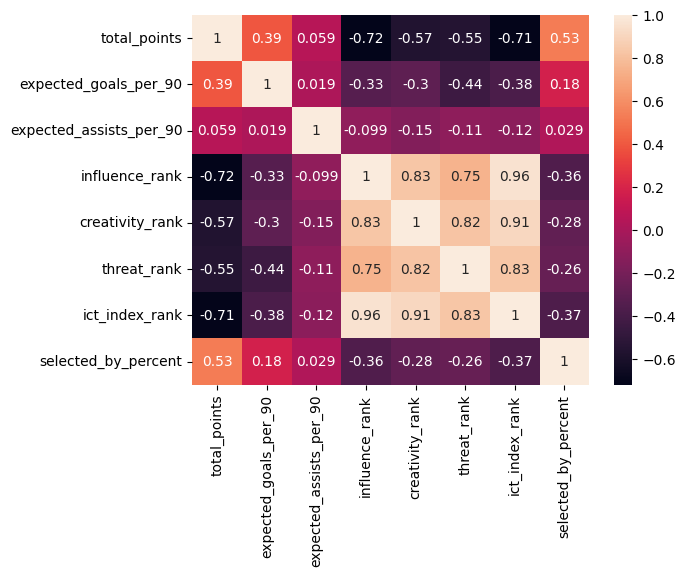

In [9]:
sns.heatmap(df[['total_points','expected_goals_per_90','expected_assists_per_90','influence_rank',
                'creativity_rank','threat_rank','ict_index_rank','selected_by_percent']].corr(),annot=True)